In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_db_sfz = pd.read_table("./DB_SUM.txt")

In [3]:
df_db_sfz['SUM_CB_JE'] = df_db_sfz['SUM_CB_JE'].fillna(0)
df_db_sfz['SUM_FC_MJ'] = df_db_sfz['SUM_FC_MJ'].fillna(0)
df_db_sfz['SUM_GJJDK_JE'] = df_db_sfz['SUM_GJJDK_JE'].fillna(0)
df_db_sfz['SUM_GJJJN_JE'] = df_db_sfz['SUM_GJJJN_JE'].fillna(0)
df_db_sfz['SUM_SW_JE'] = df_db_sfz['SUM_SW_JE'].fillna(0)
df_db_sfz['SFZ'] = df_db_sfz['SFZ'].astype('str')
xb_mapping = {
           '男': 1,
           '女': 0}

df_db_sfz['XB'] = df_db_sfz['XB'].map(xb_mapping)
df_db_sfz.head(1)

,SFZ,SUM_CB,SUM_CL,SUM_FC,SUM_GJJDK,SUM_GJJJN,SUM_QY,SUM_SW,SUM_ALL,SUM_CB_JE,...,SUM_GJJDK_JE,SUM_GJJJN_JE,SUM_SW_JE,DB_HH,DB_JE,XB,NL,FL,XM,JDXZ
0,330602197503270517,1,0,0,0,0,0,0,1,625.86,...,0.0,0.0,0.0,2042091.0,540.0,1,43,2,陈立荣,曹娥街道


In [4]:
# print(df_db_sfz.shape)
# df_db_sfz1 = df_db_sfz[(df_db_sfz['SUM_GJJDK_JE'] == 130000)]
# df_db_sfz = df_db_sfz[(df_db_sfz['SFZ'] != '330622196604048414')]
# print(df_db_sfz.shape)
# print(df_db_sfz1.shape)
# print(df_db_sfz2.shape)
# print(df_db_sfz1)
df_db_sfz_num  = df_db_sfz.drop(['SFZ','SUM_GJJDK_JE','XM','JDXZ'],1)
df_db_sfz_num = df_db_sfz_num[(df_db_sfz_num['SUM_ALL'] != 0)]
df_db_sfz_num.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2765 entries, 0 to 7722
Data columns (total 17 columns):
SUM_CB          2765 non-null int64
SUM_CL          2765 non-null int64
SUM_FC          2765 non-null int64
SUM_GJJDK       2765 non-null int64
SUM_GJJJN       2765 non-null int64
SUM_QY          2765 non-null int64
SUM_SW          2765 non-null int64
SUM_ALL         2765 non-null int64
SUM_CB_JE       2765 non-null float64
SUM_FC_MJ       2765 non-null float64
SUM_GJJJN_JE    2765 non-null float64
SUM_SW_JE       2765 non-null float64
DB_HH           2765 non-null float64
DB_JE           2765 non-null float64
XB              2765 non-null int64
NL              2765 non-null int64
FL              2765 non-null int64
dtypes: float64(6), int64(11)
memory usage: 388.8 KB


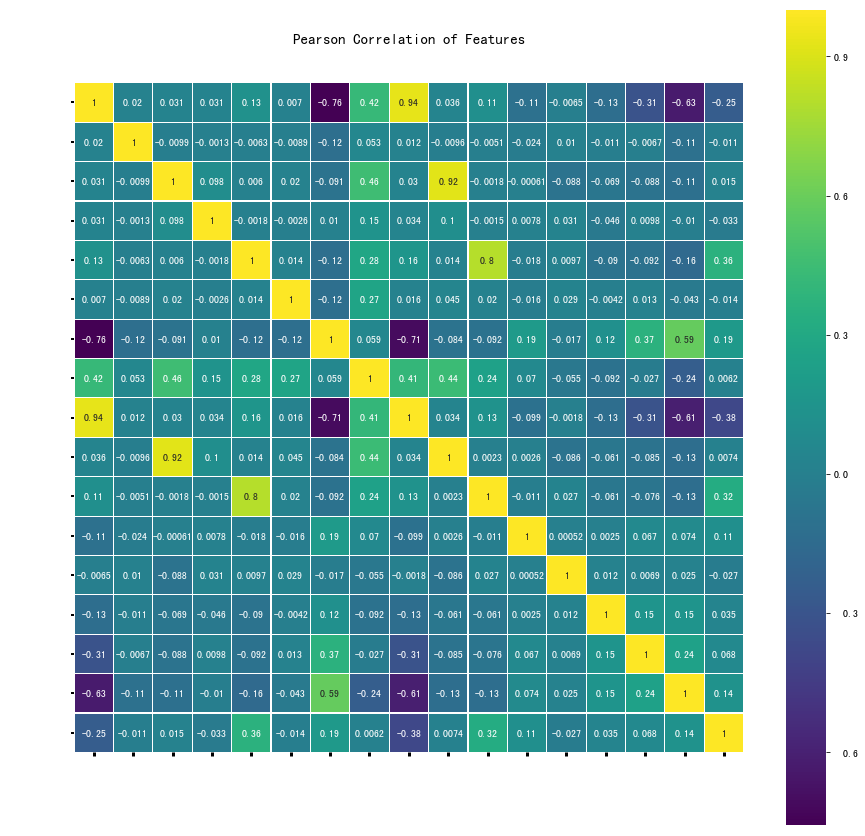

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
colormap = plt.cm.viridis
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.tick_params(axis='x',labelcolor='white', labelsize='medium', width=3)
ax.tick_params(axis='y',labelcolor='white', labelsize='medium', width=2)
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(df_db_sfz_num.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, xticklabels=True, yticklabels=True)
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
train_df, verify_df = train_test_split(df_db_sfz_num, test_size = 0.3)

In [7]:
# 均值化
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()
train_df = minMax.fit_transform(train_df)
verify_df = minMax.fit_transform(verify_df)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [8]:
def get_batch(data_x,batch_size=32):
    batch_n=len(data_x)//batch_size
    for i in range(batch_n):
        batch_x=data_x[i*batch_size:(i+1)*batch_size]
        
        yield batch_x

1.10.0
Epoch: 0001 cost= 0.032090507
Epoch: 0002 cost= 0.023562424
Epoch: 0003 cost= 0.019963343
Epoch: 0004 cost= 0.019209340
Epoch: 0005 cost= 0.016451254
Epoch: 0006 cost= 0.013435850
Epoch: 0007 cost= 0.013012175
Epoch: 0008 cost= 0.012684427
Epoch: 0009 cost= 0.012453458
Epoch: 0010 cost= 0.012276153
Optimization Finished!
(830, 2)


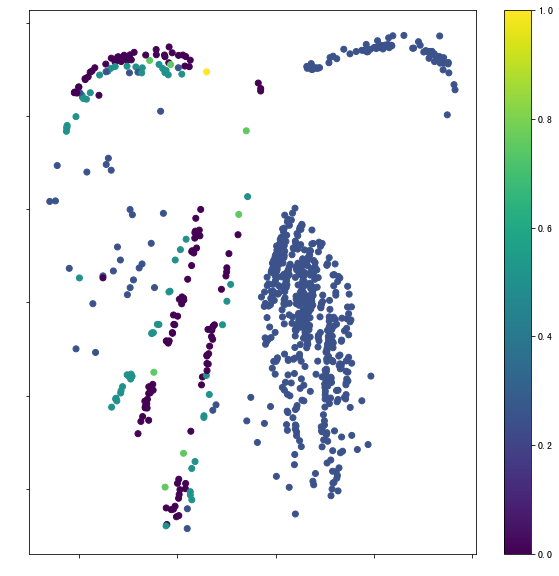

In [9]:
# Encoder
import tensorflow as tf
import matplotlib.pyplot as plt
learning_rate = 0.01
training_epochs = 10
batch_size = 256
display_step = 1
n_input = 17
X = tf.placeholder("float", [None, n_input])
 
n_hidden_1 = 128
n_hidden_2 = 64
n_hidden_3 = 10
n_hidden_4 = 2
weights = {
    'encoder_h1': tf.Variable(tf.truncated_normal([n_input, n_hidden_1],)),
    'encoder_h2': tf.Variable(tf.truncated_normal([n_hidden_1, n_hidden_2],)),
    'encoder_h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_3],)),
    'encoder_h4': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_4],)),
    'decoder_h1': tf.Variable(tf.truncated_normal([n_hidden_4, n_hidden_3],)),
    'decoder_h2': tf.Variable(tf.truncated_normal([n_hidden_3, n_hidden_2],)),
    'decoder_h3': tf.Variable(tf.truncated_normal([n_hidden_2, n_hidden_1],)),
    'decoder_h4': tf.Variable(tf.truncated_normal([n_hidden_1, n_input],)),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([n_hidden_3])),
    'encoder_b4': tf.Variable(tf.random_normal([n_hidden_4])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_3])),
    'decoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b3': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b4': tf.Variable(tf.random_normal([n_input])),
}
def encoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['encoder_h3']),
                                   biases['encoder_b3']))
    # 为了便于编码层的输出，编码层随后一层不使用激活函数
    layer_4 = tf.add(tf.matmul(layer_3, weights['encoder_h4']),
                                    biases['encoder_b4'])
    return layer_4
 
def decoder(x):
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, weights['decoder_h3']),
                                biases['decoder_b3']))
    layer_4 = tf.nn.sigmoid(tf.add(tf.matmul(layer_3, weights['decoder_h4']),
                                biases['decoder_b4']))
    return layer_4
 
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)
 
y_pred = decoder_op
y_true = X
 
cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
print(tf.__version__)
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    total_batch = int(train_df.shape[0]/batch_size)
    for epoch in range(training_epochs):
        for i in range(total_batch):
            for batch_xs in get_batch(train_df,batch_size):
                _, c = sess.run([optimizer, cost], feed_dict={X: batch_xs})
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
    print("Optimization Finished!")
 
    encoder_result = sess.run(encoder_op, feed_dict={X: verify_df})
    print(encoder_result.shape)
    fig = plt.figure(figsize=(10,10)) 
    ax = fig.add_subplot(111)
    
    ax.tick_params(labelcolor='white', labelsize='medium')
    plt.scatter(encoder_result[:, 0], encoder_result[:, 1], c=verify_df[:,16])
    
    plt.colorbar()
    plt.show()

In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
%matplotlib qt
%config InlineBackend.figure_format = 'svg'
fig = plt.figure(figsize=(9, 6))
tf.set_random_seed(1)

# Hyper Parameters
BATCH_SIZE = 64
LR = 0.002         # learning rate
N_TEST_IMG = 5

# Mnist digits
mnist = train_df    # use not one-hotted target data
test_x = verify_df
test_y = verify_df[:,16]

# tf placeholder
tf_x = tf.placeholder(tf.float32, [None, 17])    # value in the range of (0, 1)

# encoder
en0 = tf.layers.dense(tf_x, 128, tf.nn.tanh)
en1 = tf.layers.dense(en0, 64, tf.nn.tanh)
en2 = tf.layers.dense(en1, 12, tf.nn.tanh)
encoded = tf.layers.dense(en2, 3)

# decoder
de0 = tf.layers.dense(encoded, 12, tf.nn.tanh)
de1 = tf.layers.dense(de0, 64, tf.nn.tanh)
de2 = tf.layers.dense(de1, 128, tf.nn.tanh)
decoded = tf.layers.dense(de2, 17, tf.nn.sigmoid)

loss = tf.losses.mean_squared_error(labels=tf_x, predictions=decoded)
train = tf.train.AdamOptimizer(LR).minimize(loss)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# initialize figure
# f, a = plt.subplots(2, N_TEST_IMG, figsize=(5, 2))
# plt.ion()   # continuously plot

# original data (first row) for viewing
# view_data = mnist.test.images[:N_TEST_IMG]
# for i in range(N_TEST_IMG):
#     a[0][i].imshow(np.reshape(view_data[i], (28, 28)), cmap='gray')
#     a[0][i].set_xticks(()); a[0][i].set_yticks(())

for step in range(80):
#     b_x, b_y = mnist.train.next_batch(BATCH_SIZE)
    for b_x in get_batch(train_df,BATCH_SIZE):
        _, encoded_, decoded_, loss_ = sess.run([train, encoded, decoded, loss], {tf_x: b_x})

    if step % 100 == 0:     # plotting
        print('train loss: %.4f' % loss_)
        # plotting decoded image (second row)
#         decoded_data = sess.run(decoded, {tf_x: view_data})
#         for i in range(N_TEST_IMG):
#             a[1][i].clear()
#             a[1][i].imshow(np.reshape(decoded_data[i], (28, 28)), cmap='gray')
#             a[1][i].set_xticks(()); a[1][i].set_yticks(())
        plt.draw(); plt.pause(0.01)
plt.ioff()

# visualize in 3D plot
view_data = test_x[:200]
encoded_data = sess.run(encoded, {tf_x: view_data})
fig = plt.figure(figsize=(9,6)); ax = Axes3D(fig)
X, Y, Z = encoded_data[:, 0], encoded_data[:, 1], encoded_data[:, 2]
for x, y, z, s in zip(X, Y, Z, test_y):
    c = cm.rainbow(int(255*s/9)); ax.text(x, y, z, s, backgroundcolor=c)
ax.set_xlim(X.min(), X.max()); ax.set_ylim(Y.min(), Y.max()); ax.set_zlim(Z.min(), Z.max())
plt.show()

train loss: 0.0306


Extracting ./mnist/MNIST_data/train-images-idx3-ubyte.gz
Extracting ./mnist/MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./mnist/MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/MNIST_data/t10k-labels-idx1-ubyte.gz


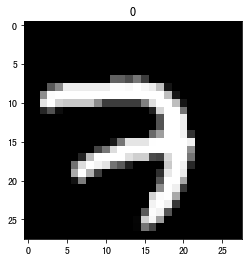

In [7]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/MNIST_data', one_hot=False) 
plt.imshow(mnist.train.images[0].reshape((28, 28)), cmap='gray')
plt.title('%i' % np.argmax(mnist.train.labels[0]))
plt.show()